# Packages

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow # colab

# 1. Image

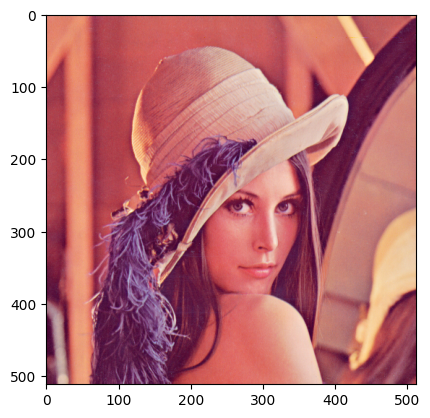

In [2]:
img = cv2.cvtColor(cv2.imread('images/Lenna.png'), cv2.COLOR_BGR2RGB)
# img = cv2.imread('Lenna.png') # colab
plt.imshow(img)
plt.show()

In [3]:
img

array([[[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       ...,

       [[ 84,  18,  60],
        [ 84,  18,  60],
        [ 92,  27,  58],
        ...,
        [173,  73,  84],
        [172,  68,  76],
        [177,  62,  79]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]]

# 2. RGB to Gray Scale

In [4]:
def rgb2gray(image):

  r, g, b = cv2.split(image)

  gray = (0.299 * r + 0.587 * g + 0.114 * b).astype(np.uint8)

  return gray

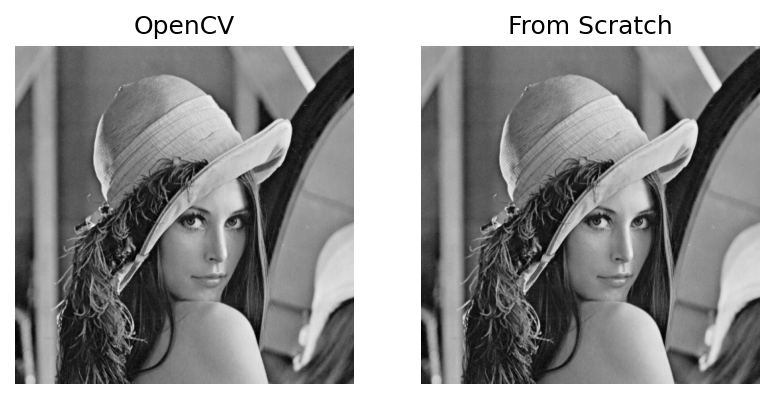

In [5]:
gray_from_scratch = rgb2gray(img)

gray_cv2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

fig, ax = plt.subplots(nrows = 1, ncols = 2, dpi = 150)
ax[0].imshow(gray_cv2, cmap = 'gray')
ax[1].imshow(gray_from_scratch, cmap = 'gray')

ax[0].set_title('OpenCV')
ax[0].axis('off')
ax[1].set_title('From Scratch')
ax[1].axis('off')

plt.show()

# 3. RGB to CMYK

In [6]:
def rgb2cmyk(image):

  r, g, b = cv2.split(image)

  r1 = r / 255
  g1 = g / 255
  b1 = b / 255

  K = np.zeros((img.shape[0], img.shape[1])).astype(np.uint8)

  C = (((1 - r1 - K) / (1 - K)) * 255).astype(np.uint8)

  M = (((1 - g1 - K) / (1 - K)) * 255).astype(np.uint8)

  Y = (((1 - b1 - K) / (1 - K)) * 255).astype(np.uint8)

  cmyk = cv2.merge((C, M, Y, K))

  return cmyk

In [7]:
cmyk_from_scratch = rgb2cmyk(img)

In [8]:
from PIL import Image

image = Image.open('images/Lenna.png')

cmyk_PIL = np.array(image.convert('CMYK'))

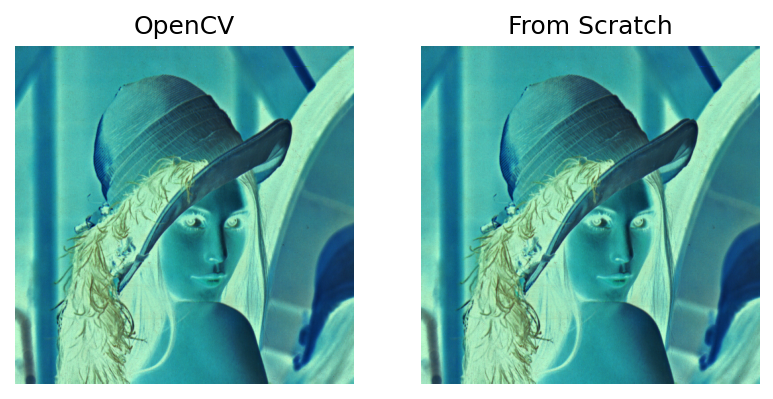

In [9]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, dpi = 150)
ax[0].imshow(cmyk_PIL[:, :, :3])
ax[1].imshow(cmyk_from_scratch[:, :, :3])

ax[0].set_title('OpenCV')
ax[0].axis('off')
ax[1].set_title('From Scratch')
ax[1].axis('off')

plt.show()

# 4. RGB to HSV

In [10]:
def rgb2hsv(image):

  img_blank = np.zeros_like(image, dtype=np.uint8)

  for x, row in enumerate(img):
      for y, pixel in enumerate(row):
          r = pixel[0] / 255.0
          g = pixel[1] / 255.0
          b = pixel[2] / 255.0

          max_val = np.max(np.array([r, g, b]))
          min_val = np.min(np.array([r, g, b]))
          delta = max_val - min_val
          
          if delta == 0:
              h = 0
          elif max_val == r:
              h = 60 * (((g - b) / delta) % 6)
          elif max_val == g:
              h = 60 * (((b - r) / delta) + 2)
          elif max_val == b:
              h = 60 * (((r - g) / delta) + 4)

          s = 0 if max_val == 0 else (delta / max_val) * 255

          v = max_val * 255

          h = (h / 6) * 255

          h = h.astype(np.uint8)
          s = s.astype(np.uint8)
          v = v.astype(np.uint8)

          img_blank[x][y] = [h, s, v]

  return img_blank

In [11]:
hsv_cv2 = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
hsv_from_scratch = rgb2hsv(img)

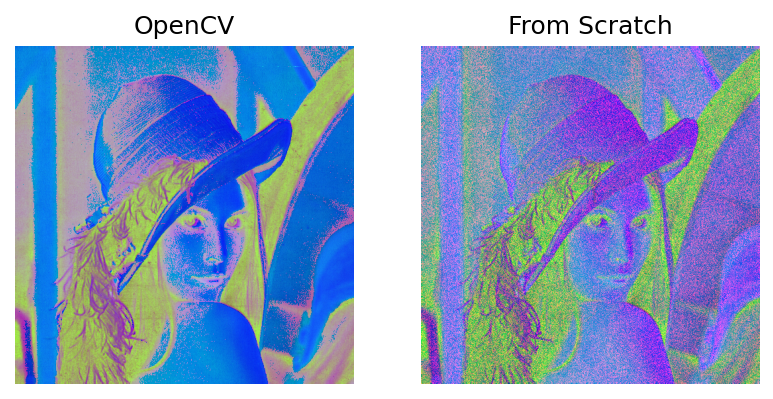

In [12]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, dpi = 150)
ax[0].imshow(hsv_cv2)
ax[1].imshow(hsv_from_scratch)

ax[0].set_title('OpenCV')
ax[0].axis('off')
ax[1].set_title('From Scratch')
ax[1].axis('off')

plt.show()